# DATA PRE-PROCESSING TECHNIQUES

In [116]:
import sklearn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

import datetime

# PART 1: Working with Continuous Target

In [117]:
automobile_df = pd.read_csv('cars.csv')

automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [118]:
automobile_df.shape

(394, 12)

In [ ]:
# Replace the '?' value with NaN values

In [119]:
automobile_df = automobile_df.replace('?', np.nan)

automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [120]:
#Check missing values in columns
#Some columns have noticeable numbers of NAs
automobile_df.isna().sum()

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [121]:
#Fill NAN in MPG Column with the mean of the MPG column
#Reconfirm to now be sure MPG has no NANs again.

automobile_df['MPG'] = automobile_df['MPG'].fillna(automobile_df['MPG'].mean())

automobile_df.isna().sum()

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [122]:
#Drop other NAs in the entire dataframe
automobile_df = automobile_df.dropna()

In [123]:
automobile_df.shape

(387, 12)

In [124]:
#Confirm that no column have NAs present again
automobile_df.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [125]:
#Drop the string column 'Model' since its not needed for our ML
automobile_df.drop(['Model'], axis=1, inplace=True)

In [126]:
#Show random sample from the dataframe
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
69,13.0,-,400,190,4422,12.5,1972,US,3.58,3.64,21.5
156,16.0,8,318,150,4498,14.5,1975,US,3.19,3.03,9
49,28.0,4,116,90,2123,14,1971[1973],Europe,3.54,2.76,11.5
135,13.0,8,350,150,4699,14.5,1974,US,3.54,3.07,9.3
214,31.5,4,98,68,2045,18.5,1977,Japan,3.19,3.40,9


In [127]:
#Scale down your dataset by removing some columns.
automobile_df.drop(['bore', 'stroke', 'compression-ratio'], inplace=True, axis=1)

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [128]:
#Check how many values in the 'Year' column is numeric and how many are not.
automobile_df['Year'].str.isnumeric().value_counts()

True     351
False     36
Name: Year, dtype: int64

In [129]:
#List out those values that are not captured as numeric
automobile_df['Year'].loc[automobile_df['Year'].str.isnumeric() == False]

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [130]:
#Extract only the first four digits from 'Year' values

extr = automobile_df['Year'].str.extract(r'^(\d{4})', expand=False)

extr.head()

0    1970
3    1970
4    1970
6    1970
7    1970
Name: Year, dtype: object

In [131]:
automobile_df['Year'].isnull().values.any()

False

In [132]:
#Populate the year column with the extracted 4 digits year values
automobile_df['Year'] = pd.to_numeric(extr)
automobile_df['Year'].dtype

dtype('int64')

In [133]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970,"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970,US]
6,14.000000,8,454,220,4354,9,1970,"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


Add an Age Column

In [134]:
automobile_df['Age'] = datetime.datetime.now().year - automobile_df['Year']

automobile_df.drop(['Year'], axis=1, inplace=True)

automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
382,25.0,6,181,110,2945,16.4,US,39
105,12.0,8,350,180,4499,12.5,US,48
330,32.7,6,168,132,2910,11.4,Japan,41
209,16.5,6,168,120,3820,16.7,Europe,45
354,31.6,4,120,74,2635,18.3,Japan,40


In [135]:
automobile_df.dtypes

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [136]:
#Check to see if null values exist in the Cylinders column
automobile_df['Cylinders'].isnull().values.any()

False

In [137]:
automobile_df['Cylinders'].str.isnumeric().value_counts()

True     378
False      9
Name: Cylinders, dtype: int64

In [138]:
#Values that are not numeric are represnted by dashes
automobile_df['Cylinders'].loc[automobile_df['Cylinders'].str.isnumeric() == False]

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [139]:
#Get the mean of other values that are not dashes.
#Store the mean as 'cmean'

cylinders = automobile_df['Cylinders'].loc[automobile_df['Cylinders'] != '-']

cmean = cylinders.astype(int).mean()

In [140]:
cmean

5.420634920634921

In [141]:
#Now replace the all the dashes with the mean value
automobile_df['Cylinders'] = automobile_df['Cylinders'].replace('-', cmean).astype(int)

In [142]:
automobile_df.head(30)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307,130,3504,12,"US; Detroit, Michigan",51
3,16.000000,8,304,150,3433,12,US,51
4,17.000000,8,302,140,3449,10.5,US],51
6,14.000000,8,454,220,4354,9,"US; Detroit, Michigan",51
7,23.551429,8,440,215,4312,8.5,US,51
8,14.000000,8,455,225,4425,8.5,US,51
9,15.000000,8,390,190,3850,8.5,US],51
10,15.000000,8,383,170,3563,10,US,51
11,14.000000,5,340,160,3609,8,US,51
12,23.551429,8,400,150,3761,9.5,"US; Detroit, Michigan",51


In [143]:
automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [144]:
#Change 'displacement' to numeric data type
automobile_df['Displacement'] = pd.to_numeric(automobile_df['Displacement'], errors='coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [145]:
#Change 'weight' also into numeric data type

automobile_df['Weight'] = pd.to_numeric(automobile_df['Weight'], errors='coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration     object
Origin           object
Age               int64
dtype: object

In [146]:
automobile_df['Acceleration'] = pd.to_numeric(automobile_df['Acceleration'], errors='coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [147]:
automobile_df['Origin'].head(15)

0     US; Detroit, Michigan
3                        US
4                       US]
6     US; Detroit, Michigan
7                        US
8                        US
9                       US]
10                       US
11                       US
12    US; Detroit, Michigan
13                       US
14             Japan; Aichi
15                       US
16                      US]
17                       US
Name: Origin, dtype: object

In [148]:
#Check the Unique categories of Origin in the dataset
#Some Countries have specific state names attached

automobile_df['Origin'].unique()

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [149]:
#Where 'US' appears concantitate all under a common name 'US'
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('US'), 
                                   'US', 
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [150]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Japan'), 
                                   'Japan',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe-Germany', 'Europe', 'Europe Germany'],
      dtype=object)

In [151]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Europe'), 
                                   'Europe', 
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [152]:
#View the cleaned dataset
automobile_df.head(20)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,51
3,16.000000,8,304.0,150,3433,12.0,US,51
4,17.000000,8,302.0,140,3449,10.5,US,51
6,14.000000,8,454.0,220,4354,9.0,US,51
7,23.551429,8,440.0,215,4312,8.5,US,51
8,14.000000,8,455.0,225,4425,8.5,US,51
9,15.000000,8,390.0,190,3850,8.5,US,51
10,15.000000,8,383.0,170,3563,10.0,US,51
11,14.000000,5,340.0,160,3609,8.0,US,51
12,23.551429,8,400.0,150,3761,9.5,US,51


# Describe the Data

In [153]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,44.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,39.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,42.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,45.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,48.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,51.000000


In [154]:
#Save the cleaned dataset in csv format
automobile_df.to_csv('cars_processed.csv', index=False)

# Visualizing Relationships

In [155]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Miles per gallon')

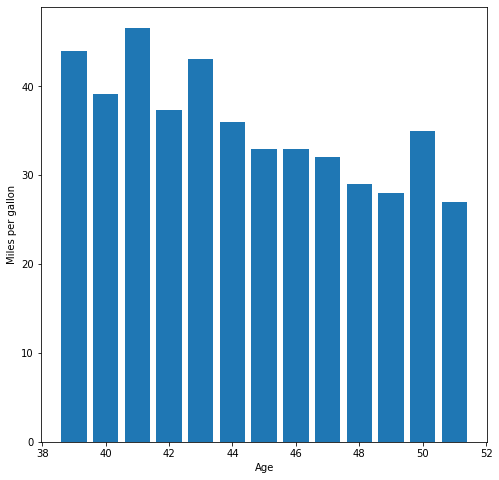

In [156]:
plt.figure(figsize=(8, 8))

plt.bar(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

#Aged cars have lower miles per gallon

Text(0, 0.5, 'Miles per gallon')

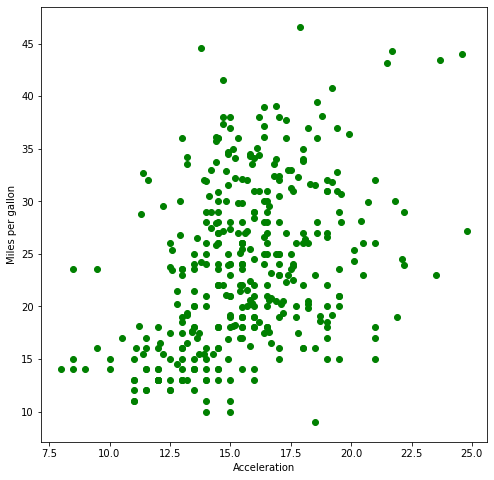

In [157]:
plt.figure(figsize=(8, 8))

plt.scatter(automobile_df['Acceleration'], automobile_df['MPG'], color='g')

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

#Higher acceleration means higher miles per gallon

Text(0, 0.5, 'Miles per gallon')

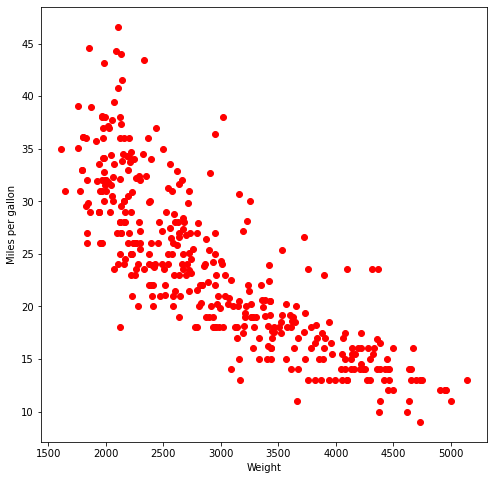

In [158]:
plt.figure(figsize=(8, 8))

plt.scatter(automobile_df['Weight'], automobile_df['MPG'], color='r')

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

#The more the weight the less miles per gallon

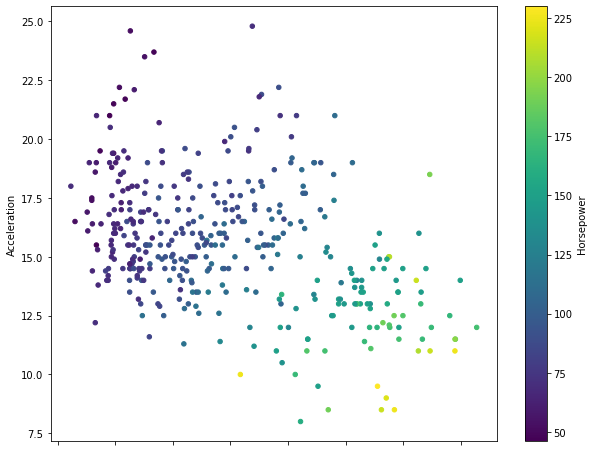

In [159]:
automobile_df.plot.scatter(x='Weight',
                           y='Acceleration',
                           c='Horsepower',
                           colormap='viridis',
                           figsize=(10, 8));

Text(0, 0.5, 'Miles per gallon')

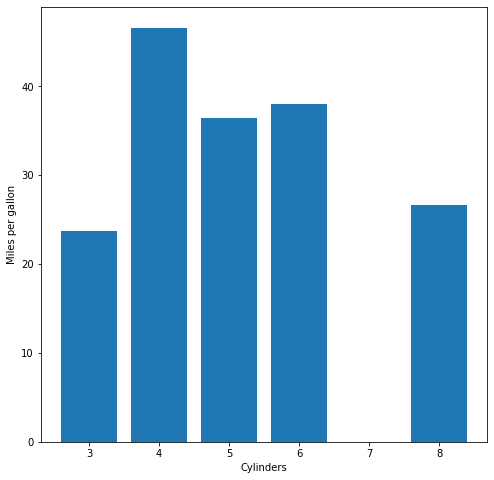

In [160]:
plt.figure(figsize=(8, 8))

plt.bar(automobile_df['Cylinders'], automobile_df['MPG'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

# Histogram

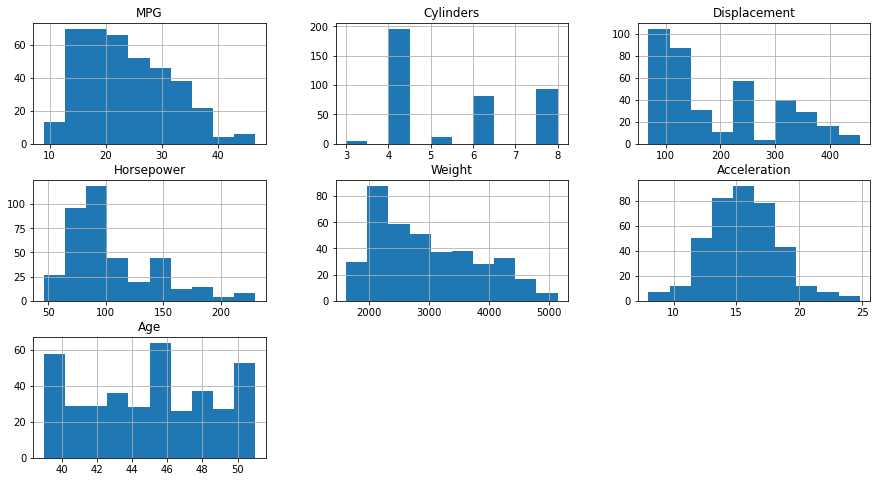

In [161]:
#This gives us the distribution of values from our columns
automobile_df.hist(figsize=(15, 8))
plt.show()

Next we will use KDE plot and Boxplot so we are dropping cylinders and Origin columns being categorical data.

In [162]:
automobile_df.drop(['Cylinders', 'Origin'], axis=1, inplace=True)

automobile_df.sample(10)

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
179,33.0,91.0,53,1795,17.5,46
207,19.0,120.0,88,3270,21.9,45
317,31.3,120.0,75,2542,17.5,41
85,14.0,304.0,150,3672,11.5,48
114,15.0,350.0,145,4082,13.0,48
3,16.0,304.0,150,3433,12.0,51
298,23.9,260.0,90,3420,22.2,42
24,21.0,199.0,90,2648,15.0,51
285,16.5,351.0,138,3955,13.2,42
344,37.7,89.0,62,2050,17.3,40


Plotting Density estimation plot

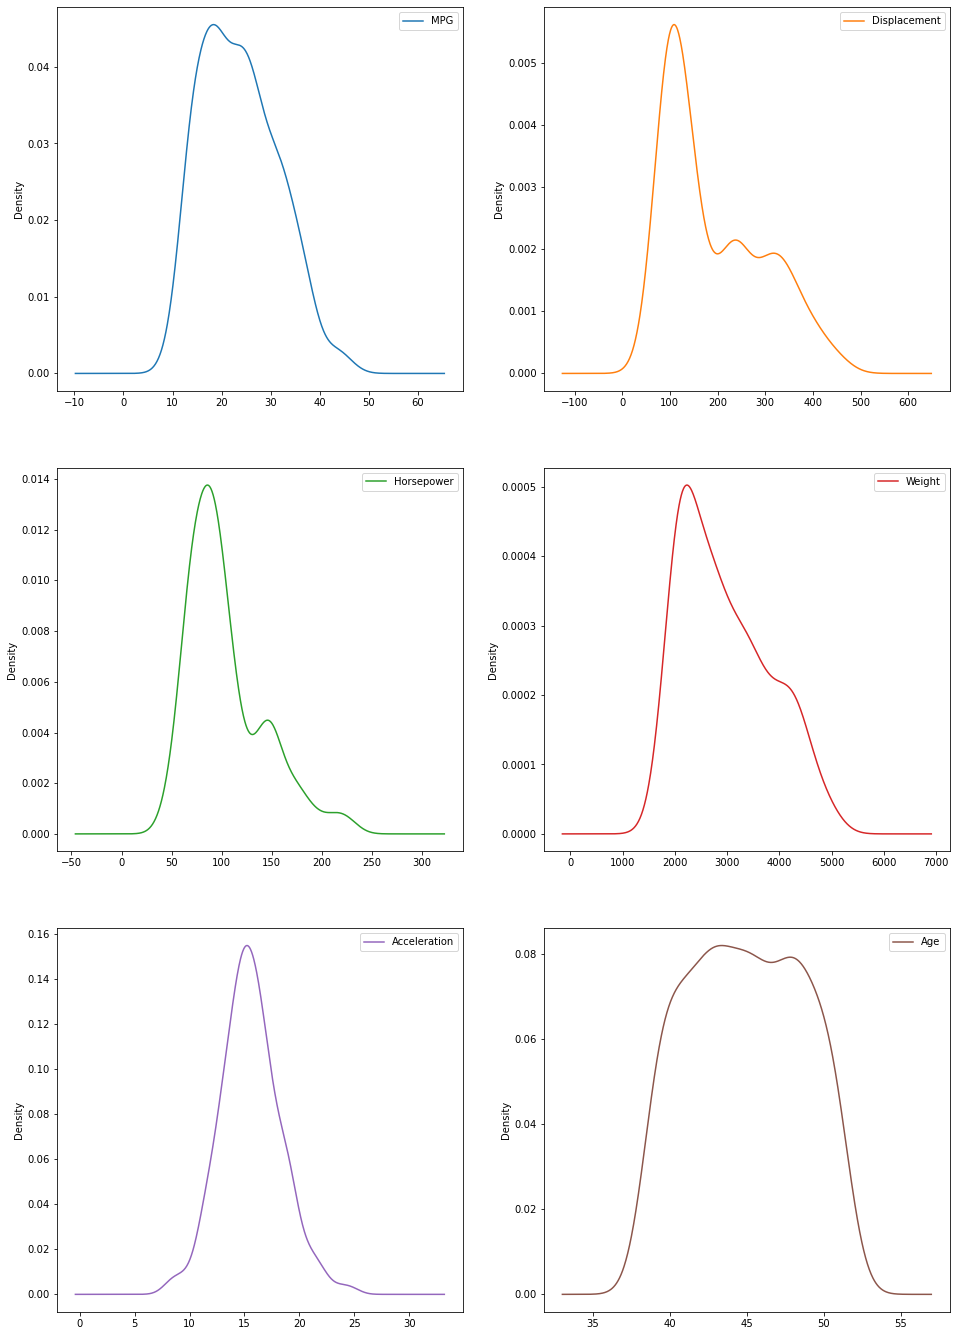

In [163]:
#A density plot is a smoothed, continuous version of a histogram estimated from the data. 

automobile_df.plot(kind='density', 
                   subplots=True, 
                   layout=(3, 2), 
                   sharex=False, 
                   figsize=(16, 24))

plt.show()

C:\Users\helov\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Displacement', ylabel='Density'>

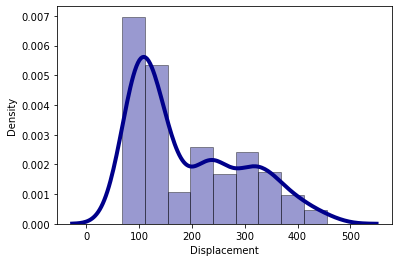

In [164]:
# Density Plot and Histogram of all arrival delays
sns.distplot(automobile_df['Displacement'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Plotting Box plot

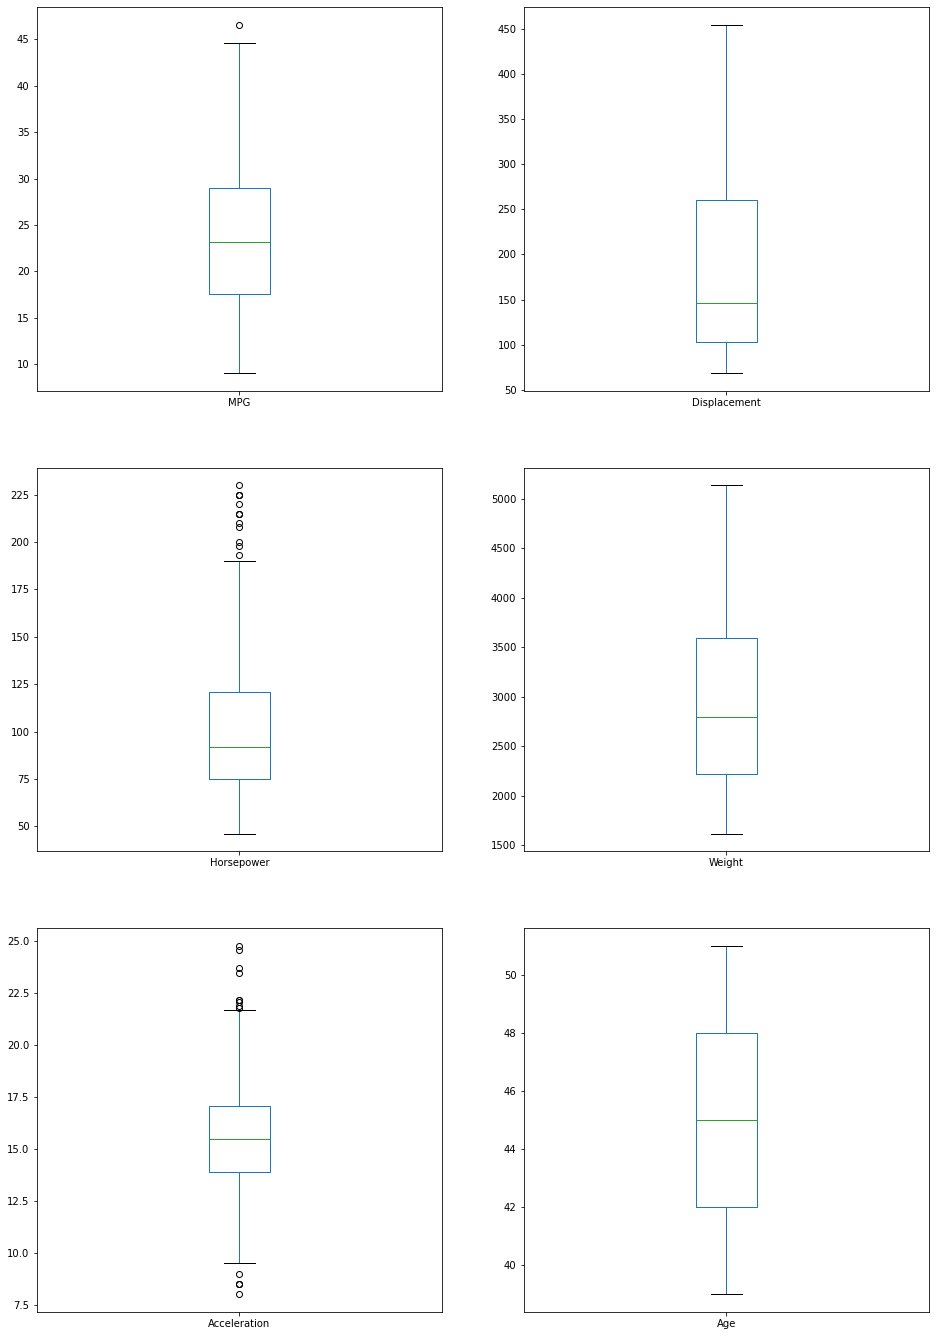

In [165]:
automobile_df.plot(kind='box', 
                   subplots=True, 
                   layout=(3, 2), 
                   sharex=False, 
                   figsize=(16, 24))

plt.show()

In [166]:
cars_corr = automobile_df.corr()

cars_corr

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Displacement,-0.788492,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.357047,0.404458,0.299049,-0.292705,1.000000


<AxesSubplot:>

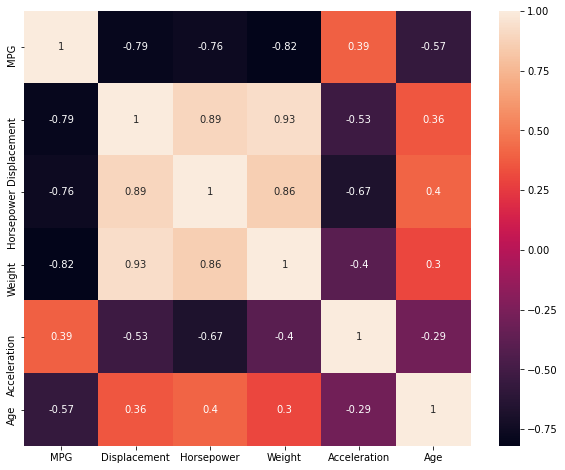

In [167]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(cars_corr, annot = True)

# Apply One-Hot Encoding on the Origin Column

In [ ]:
cars=pd.read_csv("cars_processed.csv")

In [ ]:
cars.head()

In [ ]:
cars.Origin.unique #Check for unique entries for Origin Column.

In [ ]:
automobile_df = pd.get_dummies(cars, columns=['Origin'])

automobile_df.head()